In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [496]:
train = pd.read_csv("C:\\Users\\19258\\Downloads\\pfm_train.csv")
test = pd.read_csv("C:\\Users\\19258\\Downloads\\pfm_test.csv")
        
train.drop(["Over18", "StandardHours"], axis = 1, inplace = True)
test.drop(["Over18", "StandardHours"], axis = 1, inplace = True)
combine = pd.concat([train, test], sort = False)

#Creating a dataframe for everyone who left their job
attDf = pd.DataFrame()
attDf = attDf.append(combine.iloc[:0,:])
for i in range(0, train.shape[0]):
    if(train.Attrition[i] == 1):
        attDf = attDf.append(train.iloc[i,:])

#Creating a dataframe for all false negatives
tempDf = pd.DataFrame()
tempDf = attDf.append(combine.iloc[:0,:])
enNum = [1066,681,493,663,1052,623,971,664,159,363,507,862,357,1029,559,963,723,750,253,757,200,994,
        47,1048,723,862,644,453,78,587,682,580,984,688,200,860,529,386,159,336,494,716,510,653,
        1048,357,386,644,615,336,385,66,200,511,453,392,223,982,47,1052,886,363,392,556,994,1093,269,
        507,390,157,743,985,529,4,510,671,891,386,886,525,355,130,892,10,379,790,47,746,633,463,275,115,
        743,66,935,494,510,753,644,559,253,892,166,576,985,780,580,653,587,157,695,1052]
for i in range(0, train.shape[0] - 4):
    if(train.EmployeeNumber[i] in enNum):
        tempDf = tempDf.append(train.iloc[i,:])
    
#Getting rid of outliers
attDf = attDf[attDf['TotalWorkingYears'] < 38]
combine = combine[combine['TotalWorkingYears'] < 38]
attDf = attDf[attDf['EmployeeNumber'] != 1167]
combine = combine[combine['EmployeeNumber'] != 1167]
attDf = attDf[attDf['EmployeeNumber'] != 1360]
combine = combine[combine['EmployeeNumber'] != 1360]

In [497]:
#No missing values
#Doing encoding
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#Label encoding for some features
#for feat in ['BusinessTravel']:
 #   le.fit(combine[feat])
  #  combine[feat] = le.transform(combine[feat])
   # le.fit(attDf[feat])
    #attDf[feat] = le.transform(attDf[feat])
#One hot encoding for some features
combine = pd.get_dummies(combine)
attDf = pd.get_dummies(attDf)
tempDf = pd.get_dummies(tempDf)

In [498]:
#Doing some feature engineering
combine['HasStockOption'] = combine['StockOptionLevel'].apply(lambda x: 1 if x > 0 else 0)
attDf['HasStockOption'] = attDf['StockOptionLevel'].apply(lambda x: 1 if x > 0 else 0)
tempDf['HasStockOption'] = tempDf['StockOptionLevel'].apply(lambda x: 1 if x > 0 else 0)

combine['EntryLevel'] = combine['JobLevel'].apply(lambda x: 1 if x == 1 else 0)
attDf['EntryLevel'] = attDf['JobLevel'].apply(lambda x: 1 if x == 1 else 0)
tempDf['EntryLevel'] = tempDf['JobLevel'].apply(lambda x: 1 if x == 1 else 0)

#combine['FastFood'] = combine['EntryLevel'] + combine['OverTime_Yes']
#combine['FastFood'] = combine['FastFood'].apply(lambda x: 1 if x == 2 else 0)

combine['StartAge'] = combine['Age'] - combine['YearsAtCompany']
attDf['StartAge'] = attDf['Age'] - attDf['YearsAtCompany']
tempDf['StartAge'] = tempDf['Age'] - tempDf['YearsAtCompany']

combine['Replaceable'] = combine['JobLevel'] + combine['JobInvolvement']
combine['Replaceable'] = combine['Replaceable'].apply(lambda x: 1 if x < 3 else 0)
attDf['Replaceable'] = attDf['JobLevel'] + attDf['JobInvolvement']
attDf['Replaceable'] = attDf['Replaceable'].apply(lambda x: 1 if x < 3 else 0)
tempDf['Replaceable'] = tempDf['JobLevel'] + tempDf['JobInvolvement']
tempDf['Replaceable'] = tempDf['Replaceable'].apply(lambda x: 1 if x < 3 else 0)

combine['Replaceable1'] = combine['JobLevel'] + combine['JobSatisfaction']
combine['Replaceable1'] = combine['Replaceable1'].apply(lambda x: 1 if x < 3 else 0)
attDf['Replaceable1'] = attDf['JobLevel'] + attDf['JobSatisfaction']
attDf['Replaceable1'] = attDf['Replaceable1'].apply(lambda x: 1 if x < 3 else 0)
tempDf['Replaceable1'] = tempDf['JobLevel'] + tempDf['JobSatisfaction']
tempDf['Replaceable1'] = tempDf['Replaceable1'].apply(lambda x: 1 if x < 3 else 0)
#combine['Consistency'] = combine['YearsAtCompany'] + combine['YearsInCurrentRole'] + combine['YearsWithCurrManager']
#attDf['Consistency'] = attDf['YearsAtCompany'] + attDf['YearsInCurrentRole'] + attDf['YearsWithCurrManager']
#combine['BadTerms'] = combine['RelationshipSatisfaction'].apply(lambda x: 0 if x > 1 else 1)

#Normalizing the data
for col in ("Age","DistanceFromHome","EmployeeNumber","MonthlyIncome","TotalWorkingYears","YearsAtCompany","StartAge",
           "YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","PercentSalaryHike","NumCompaniesWorked"):
    combine[col] = (combine[col] - combine[col].mean())/combine[col].std()
    attDf[col] = (attDf[col] - attDf[col].mean())/attDf[col].std()
    tempDf[col] = (tempDf[col] - tempDf[col].mean())/tempDf[col].std()

#Setting the target value before normalization
target = combine['Attrition'][:train.shape[0] - 4]
combine.drop("Attrition", axis = 1, inplace = True)

'''
#Fitting the PCA algorithm with our Data
pca = PCA().fit(combine)
#Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()
pca = PCA(n_components = 50)
combine = pca.fit_transform(combine)
combine = pd.DataFrame(data = combine[1:,1:],
                      index = combine[1:, 0],
                      columns = combine[0,1:])
'''

train_one = combine.iloc[:train.shape[0] - 4, :]
test_one = combine.iloc[train.shape[0] - 4:, :]

#plt.figure(figsize = (14,14))
#sns.heatmap(train_one.corr(), annot = True, fmt = '.2f')

In [495]:
#Using logistic regression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
'''
steps = [("pca", PCA()),
        ("LG", LogisticRegression())]
pipe = Pipeline(steps)
'''
parameters = {"C": [1, 1.2, 10, 20, 100], "class_weight": [{0:1.3},{0:1.6},{0:1.5},{0:1.4}],
             "solver": ['lbfgs', 'liblinear']}

#class_weight = {0:0.7}
lr_model = LogisticRegression()
random = RandomizedSearchCV(lr_model, param_distributions = parameters, cv = 6, n_jobs = -1)
random_result = random.fit(train_one, target)
lr_model.score(train_one, target)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.885949 using {'solver': 'lbfgs', 'class_weight': {0: 1.5}, 'C': 1}


C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [494]:
#Doing cross validation to get an eval set for the model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
x_train, x_valid, y_train, y_valid = train_test_split(train_one, target, test_size = 0.2)
cv = cross_validate(LogisticRegression(C = 1.2, class_weight = {0:1.4}, solver = 'lbfgs'), train_one, target, cv = 4)
#cv['test_score']
score = 0
for i in range(0, 4):
    score += cv['test_score'][i]
print(score/4)

0.8786088242657586


C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [464]:
#Using a confusion matrix to see what the errors in the predictions are
from sklearn.metrics import confusion_matrix

#Using the model to set up the confusion matrix
test_model = LogisticRegression(class_weight = {0: 1.4})
test_model.fit(x_train, y_train)
test_pred = test_model.predict(x_valid)

#Creating the confusion matrix
cm = confusion_matrix(y_valid, test_pred)
print(cm)

[[174   2]
 [ 26  18]]


C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [436]:
temp = test_pred-y_valid
temp = pd.DataFrame(temp)
temp = temp[temp["Attrition"] == -1]
temp = temp.iloc[:,-1]

In [374]:
#Using Classification Report to further understand what the errors are
from sklearn.metrics import classification_report
print(classification_report(y_valid, test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       182
         1.0       0.72      0.34      0.46        38

   micro avg       0.86      0.86      0.86       220
   macro avg       0.80      0.66      0.69       220
weighted avg       0.85      0.86      0.84       220



In [499]:
lr_model = LogisticRegression(C = 1.2, class_weight = {0:1.4}, solver = 'lbfgs')
lr_model.fit(train_one, target)
lr_predict = lr_model.predict(test_one)

C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [502]:
#Submitting the predictions
submission = pd.DataFrame({'result': lr_predict})
submission.to_csv('AttritionPrediction.csv', index = False)

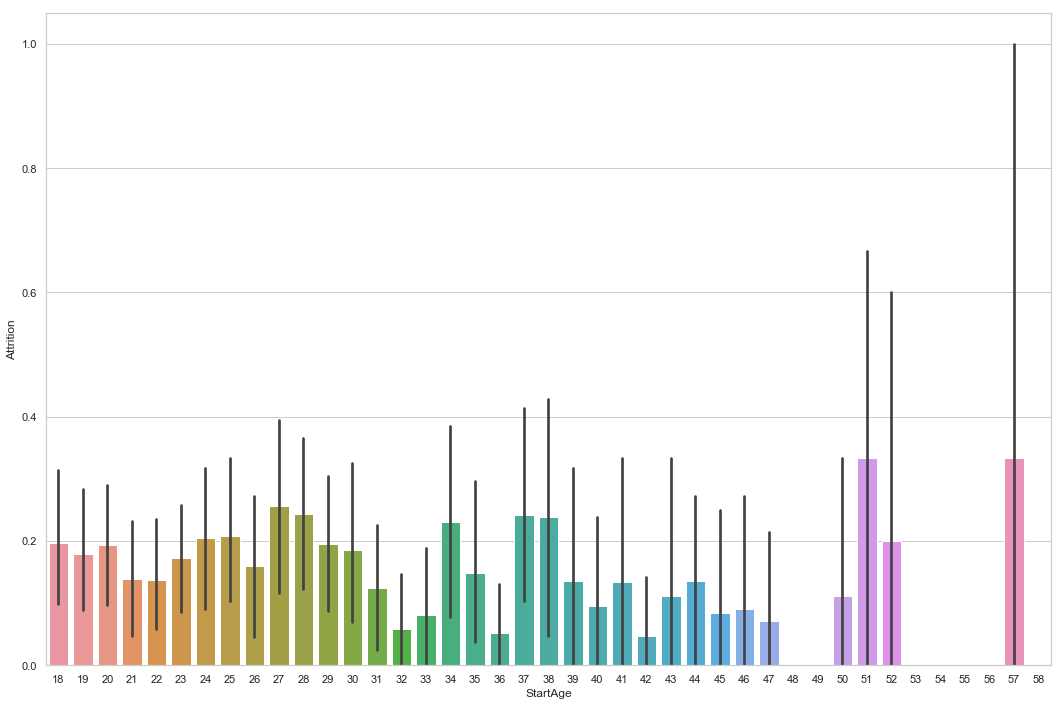

In [81]:
meanDf = attDf.mean()
meanTrain = train_one.mean()
mean = meanTrain - meanDf
mean.sort_values(ascending = False)

#Graphing the averages of each column 
plt.figure(figsize = (18, 12))
sns.set(style = "whitegrid")
sns.barplot(x = "StartAge", y = "Attrition", data = train_one)

In [465]:
(tempDf.mean() - train_one.mean()).sort_values(ascending = False)

OverTime_Yes                         0.260577
EntryLevel                           0.184273
MaritalStatus_Single                 0.153927
Replaceable1                         0.091849
BusinessTravel_Travel_Frequently     0.082387
JobRole_Laboratory Technician        0.062956
Department_Sales                     0.060929
JobRole_Sales Representative         0.059104
PerformanceRating                    0.055049
Replaceable                          0.049439
Gender_Male                          0.036564
EducationField_Technical Degree      0.027170
EducationField_Marketing             0.023013
JobRole_Research Scientist           0.015950
JobRole_Human Resources              0.011557
EducationField_Human Resources       0.010442
Department_Human Resources           0.007975
JobRole_Sales Executive              0.007941
YearsInCurrentRole                   0.005145
TotalWorkingYears                    0.001884
MonthlyIncome                        0.001247
NumCompaniesWorked                

In [193]:
print("Att job level:", attDf['JobLevel'].mean())
print("Reg job level:", train_one['JobLevel'].mean())
print("Att age:", attDf['Age'].mean())
print("Reg age:", train_one['Age'].mean())
print("Att stock level:", attDf['StockOptionLevel'].mean())
print("Reg stock level:", train_one['StockOptionLevel'].mean())
print("Att edu:", attDf['Relationship'].mean())
print("Reg edu:", train_one['WorkLifeBalance'].mean())

Att job level: 1.6292134831460674
Reg job level: 2.0545454545454547
Att age: 33.39325842696629
Reg age: 36.99909090909091
Att stock level: 0.5224719101123596
Reg stock level: 0.7881818181818182
Att edu: 2.668539325842697
Reg edu: 2.7463636363636366


In [126]:
test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,40,Non-Travel,Research & Development,9,4,Other,1449,3,Male,3,...,3,3,2,11,2,4,8,7,0,7
1,53,Travel_Rarely,Research & Development,7,2,Medical,1201,4,Female,3,...,3,2,1,26,6,3,7,7,4,7
2,42,Travel_Rarely,Research & Development,2,4,Other,477,1,Male,2,...,4,2,0,14,6,3,1,0,0,0
3,34,Travel_Frequently,Human Resources,11,3,Life Sciences,1289,3,Male,2,...,3,4,2,14,5,4,10,9,1,8
4,32,Travel_Rarely,Research & Development,1,1,Life Sciences,134,4,Male,3,...,3,4,0,1,2,3,1,0,0,0


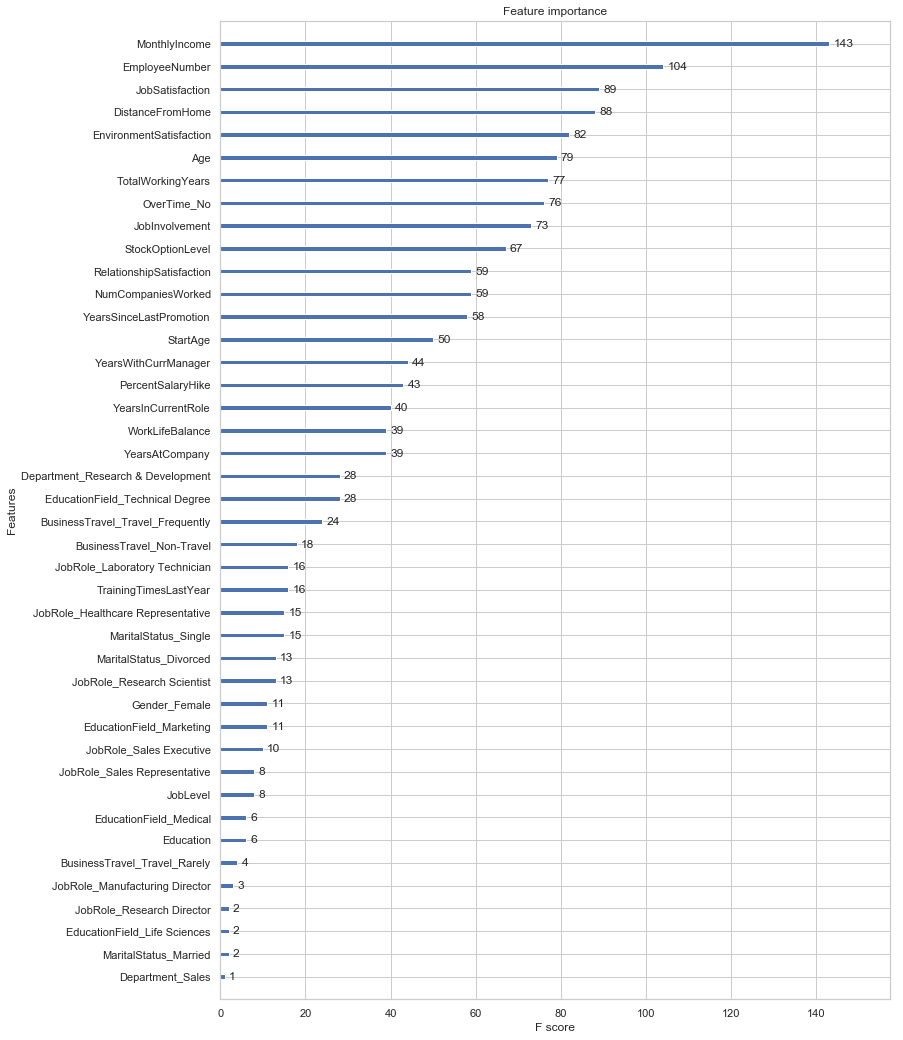

In [135]:
#Creating a model
#Trying Random Forest, Ridge, and XGBoost
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier(n_estimators = 1000, learning_rate = 0.05, random_state = 0)
xgb_model.fit(train_one, target, early_stopping_rounds = 20, eval_set = [(x_train, y_train)], verbose = False)
xgb_predict = xgb_model.predict(test_one)
fix, ax = plt.subplots(figsize = (12,18))
xgb.plot_importance(xgb_model, ax = ax)
plt.show()

In [170]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(c = 0.9)
rf_model.fit(train_one, target)
rf_predict = rf_model.predict(test_one)
rf_model.score(x_train, y_train)

C:\Users\19258\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9875

C:\Users\19258\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19258\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default s

"\n# PETAL Plot validation curve\ntrain_petal_scores, test_petal_scores = validation_curve(estimator=lr\n                                                            ,X=X_combined_petal_standard\n                                                            ,y=Y_combined_petal\n                                                            ,param_name='C'\n                                                            ,param_range=C_param_range\n                                                            )\n\n\ntrain_petal_mean = np.mean(train_petal_scores,axis=1)\ntrain_petal_std = np.std(train_petal_scores,axis=1)\ntest_petal_mean = np.mean(test_petal_scores,axis=1)\ntest_petal_std = np.std(test_petal_scores,axis=1)\n\nplt.subplot(2,2,2)\nplt.plot(C_param_range\n            ,train_petal_mean\n            ,color='blue'\n            ,marker='o'\n            ,markersize=5\n            ,label='training accuracy')\n    \nplt.plot(C_param_range\n            ,test_petal_mean\n            ,color='gre

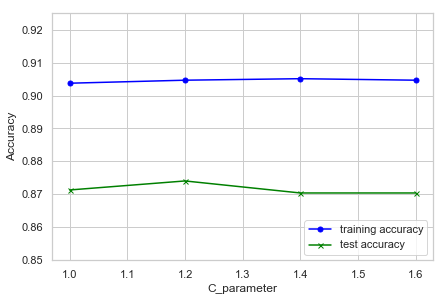

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
### 1. Use of validation curves for both datasets.
C_param_range = [1, 1.2, 1.4, 1.6]

plt.figure(figsize=(15, 10))

# Apply logistic regression model to training data
lr = LogisticRegression(penalty = 'l1',C = i,random_state = 0)

# SEPAL Plot validation curve
train_scores, test_scores = validation_curve(estimator=lr
                                            ,X=train_one
                                            ,y=target
                                            ,param_name='C'
                                            ,param_range=C_param_range
                                            )

train_sepal_mean = np.mean(train_scores,axis=1)
train_sepal_std = np.std(train_scores,axis=1)
test_sepal_mean = np.mean(test_scores,axis=1)
test_sepal_std = np.std(test_scores,axis=1)

plt.subplot(2,2,1)
plt.plot(C_param_range
            ,train_sepal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_sepal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.85,0.925])


'''
# PETAL Plot validation curve
train_petal_scores, test_petal_scores = validation_curve(estimator=lr
                                                            ,X=X_combined_petal_standard
                                                            ,y=Y_combined_petal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            )


train_petal_mean = np.mean(train_petal_scores,axis=1)
train_petal_std = np.std(train_petal_scores,axis=1)
test_petal_mean = np.mean(test_petal_scores,axis=1)
test_petal_std = np.std(test_petal_scores,axis=1)

plt.subplot(2,2,2)
plt.plot(C_param_range
            ,train_petal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_petal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])
'''

In [130]:
newb = pd.read_csv("C:\\Users\\19258\\AttritionPrediction.csv")
shank = pd.read_csv("C:\\Users\\19258\\Downloads\\EarlierPrediction.csv")

In [131]:
diff = newb-shank
diff_two = test_one[diff['result'] < 0]
diff_one = test_one[diff['result'] > 0]
(diff_two.mean() - diff_one.mean()).sort_values(ascending = False)
#diff_one

PercentSalaryHike                    8.250000e+00
StartAge                             1.400309e+00
Age                                  1.400309e+00
PerformanceRating                    7.500000e-01
StockOptionLevel                     7.500000e-01
HasStockOption                       7.500000e-01
EducationField_Medical               6.071429e-01
MaritalStatus_Divorced               5.000000e-01
BusinessTravel_Travel_Rarely         3.214286e-01
BusinessTravel_Non-Travel            2.500000e-01
EducationField_Other                 2.500000e-01
OverTime_Yes                         1.785714e-01
Education                            1.785714e-01
YearsSinceLastPromotion              1.127900e-01
JobInvolvement                       1.071429e-01
JobRole_Laboratory Technician        1.071429e-01
JobRole_Sales Executive              7.142857e-02
Department_Sales                     7.142857e-02
Gender_Male                          7.142857e-02
TotalWorkingYears                    3.264982e-02


In [51]:
coefficients = pd.concat([pd.DataFrame(train_one.columns),pd.DataFrame(np.transpose(lr_model.coef_))], axis = 1)
coefficients.columns = ['Category','Value']
coefficients.sort_values(by = 'Value', ascending = False)

,Category,Value
48,OverTime_Yes,1.311928
22,BusinessTravel_Travel_Frequently,0.988309
32,EducationField_Technical Degree,0.790320
43,JobRole_Sales Representative,0.691949
37,JobRole_Laboratory Technician,0.671589
27,EducationField_Human Resources,0.568601
26,Department_Sales,0.568180
34,Gender_Male,0.504852
36,JobRole_Human Resources,0.487508
46,MaritalStatus_Single,0.458694
